In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from k_popular_words import KMostPopularWords
from single_task import KMostSingle
from utils import ExperimentRunner

In [3]:
files = ["data/data_300MB.txt", "data/data_2.5GB.txt", "data/data_16GB.txt"]
experiment_runner = ExperimentRunner()

k = 10
chunk_size = 400*1024*1024
num_threads = 8


# Case 1: 
- Run as single task (without multi-thread and chunking
- Sorting Algorithm: python sort (Tim Sort)

In [55]:
result1 = {}

In [56]:
for file_path in files:
    try: 
        k_most = KMostPopularWords(file_path)
        baseline_result = experiment_runner.run_experiment("Baseline"+file_path, k_most.get_top_k_words_baseline, k)
        print(experiment_runner.measure)
        print(baseline_result)
        result1[file_path] = experiment_runner.measure
    except ValueError:
        result1[file_path] = [None, None, None]


Running experiment: Baselinedata/data_300MB.txt
Runtime: 32.29 seconds
CPU Utilization: 2.40%
Memory Usage: 3960.16 MB
[32.29279828071594, 2.4, 3960.15625]
[('european', 318532), ('mr', 210638), ('would', 181905), ('also', 180117), ('commission', 172768), ('must', 156850), ('president', 152132), ('union', 130292), ('states', 129472), ('member', 126221)]
Running experiment: Baselinedata/data_2.5GB.txt
Running experiment: Baselinedata/data_16GB.txt


In [57]:
result1

{'data/data_300MB.txt': [32.29279828071594, 2.4, 3960.15625],
 'data/data_2.5GB.txt': [None, None, None],
 'data/data_16GB.txt': [None, None, None]}

# Case 2: 
- Run as single task (without multi-thread and chunking
- Sorting Algorithm: python heapq nlargest ( Sort)

In [7]:
result2 = {}

In [20]:
for file_path in files:
    try: 
        k_most = KMostPopularWords(file_path)
        baseline_result = experiment_runner.run_experiment("Baseline"+file_path, k_most.get_top_k_words_baseline2, k)
        print(experiment_runner.measure)
        print(baseline_result)
        result2[file_path] = experiment_runner.measure
    except ValueError:
        result2[file_path] = [None, None, None]

Running experiment: Baselinedata/data_300MB.txt
Runtime: 32.88 seconds
CPU Utilization: 2.40%
Memory Usage: 4410.62 MB
[32.88312292098999, 2.4, 4410.62109375]
[('european', 318532), ('mr', 210638), ('would', 181905), ('also', 180117), ('commission', 172768), ('must', 156850), ('president', 152132), ('union', 130292), ('states', 129472), ('member', 126221)]
Running experiment: Baselinedata/data_2.5GB.txt
Running experiment: Baselinedata/data_16GB.txt


In [9]:
result2

{'data/data_300MB.txt': [33.04508399963379, 2.4, 1439.23828125],
 'data/data_2.5GB.txt': [],
 'data/data_16GB.txt': []}

# Case 3:
- Run as multi-tasks (with multi-thread and chunking)
- Sorting Algorithm python sort (Tim Sort)

In [10]:
file_path = "data/data_300MB.txt"
k_most = KMostPopularWords(file_path)

In [11]:
chunking_result = experiment_runner.run_experiment("Chunking", k_most.get_top_k_words_chunk, k, chunk_size)
chunking_result

Running experiment: Chunking
Runtime: 17.22 seconds
CPU Utilization: 2.40%
Memory Usage: 1772.56 MB


[('european', 316722),
 ('mr', 210160),
 ('would', 179735),
 ('also', 175907),
 ('-', 162852),
 ('must', 153791),
 ('commission', 138407),
 ('president,', 125700),
 ('member', 124360),
 ('like', 108992)]

In [12]:
result3 = {}

In [13]:
for file_path in files:
    try: 
        k_most = KMostPopularWords(file_path)
        baseline_result = experiment_runner.run_experiment("Chunking-" + file_path, k_most.get_top_k_words_chunk, k, chunk_size)
        print(experiment_runner.measure)
        print(baseline_result)
        result3[file_path] = experiment_runner.measure
    except ValueError:
        result3[file_path] = []

Running experiment: Chunking-data/data_300MB.txt
Runtime: 17.03 seconds
CPU Utilization: 2.40%
Memory Usage: 1830.36 MB
[17.02847123146057, 2.4, 1830.36328125]
[('european', 316722), ('mr', 210160), ('would', 179735), ('also', 175907), ('-', 162852), ('must', 153791), ('commission', 138407), ('president,', 125700), ('member', 124360), ('like', 108992)]
Running experiment: Chunking-data/data_2.5GB.txt
Runtime: 171.63 seconds
CPU Utilization: 2.40%
Memory Usage: 4576.35 MB
[171.62510323524475, 2.4, 4576.34765625]
[('said', 1575360), ('-', 1473479), ('would', 908990), ('one', 878036), ('new', 833235), ('said.', 726396), ('also', 716496), ('last', 688667), ('de', 640307), ('two', 615818)]
Running experiment: Chunking-data/data_16GB.txt
Runtime: 1393.65 seconds
CPU Utilization: 2.20%
Memory Usage: 5512.49 MB
[1393.6506669521332, 2.2, 5512.48828125]
[('said', 10417460), ('would', 5773732), ('new', 5490710), ('one', 5371723), ('-', 5313568), ('said.', 4693527), ('also', 4536374), ('last', 401

In [15]:
result3

{'data/data_300MB.txt': [17.02847123146057, 2.4, 1830.36328125],
 'data/data_2.5GB.txt': [171.62510323524475, 2.4, 4576.34765625],
 'data/data_16GB.txt': [1393.6506669521332, 2.2, 5512.48828125]}

# Summary

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# log Y axis
def result_plot(df, title, y_title):
    x = np.log(df['DataSize'])
    plt.plot(x, np.log(df['Case1']), marker='o', label='Case 1')
    plt.plot(x, np.log(df['Case2']), marker='o', label='Case 2')
    plt.plot(x, np.log(df['Case3']), marker='o', label='Case 3')
    
    plt.title(title + ' vs Data Size for different algorithms')
    plt.xlabel('Log Data Size in MB')
    plt.ylabel(y_title)
    plt.legend()

    # Display the plot
    plt.show()

# without log Y axis
def result_plot(df, title, y_title):
    x = np.log(df['DataSize'])
    plt.plot(x, df['Case1'], marker='o', label='Case 1')
    plt.plot(x, df['Case2'], marker='o', label='Case 2')
    plt.plot(x, df['Case3'], marker='o', label='Case 3')
    
    plt.title(title + ' vs Data Size for different algorithms')
    plt.xlabel('Log Data Size in MB')
    plt.ylabel(y_title)
    plt.legend()

    # Display the plot
    plt.show()

## Speed

In [79]:
speed = {'data/data_300MB.txt': [300],
 'data/data_2.5GB.txt': [2.5*1024],
 'data/data_16GB.txt': [16*1024]}
results = [result1, result2, result3]
for result in results:
    for key, value in result.items():
        speed.setdefault(key, []).append(value[0])
df_speed = pd.DataFrame(speed.values(), columns = ['DataSize', 'Case1', 'Case2', 'Case3'])
df_speed

,DataSize,Case1,Case2,Case3
0,300.0,32.292798,32.883123,17.028471
1,2560.0,NaN,NaN,171.625103
2,16384.0,NaN,NaN,1393.650667


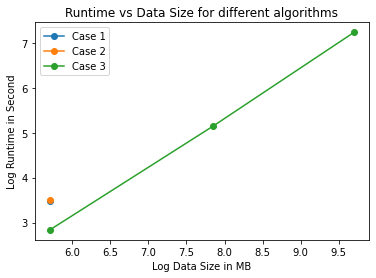

In [80]:
result_plot(df_speed, 'Runtime', 'Log Runtime in Second')

## CPU utilization

In [81]:
cpu = {'data/data_300MB.txt': [300],
 'data/data_2.5GB.txt': [2.5*1024],
 'data/data_16GB.txt': [16*1024]}
results = [result1, result2, result3]
for result in results:
    for key, value in result.items():
        cpu.setdefault(key, []).append(value[1])
df_cpu = pd.DataFrame(cpu.values(), columns = ['DataSize', 'Case1', 'Case2', 'Case3'])
df_cpu

,DataSize,Case1,Case2,Case3
0,300.0,2.4,2.4,2.4
1,2560.0,NaN,NaN,2.4
2,16384.0,NaN,NaN,2.2


## Ram Utilization

In [82]:
ram = {'data/data_300MB.txt': [300],
 'data/data_2.5GB.txt': [2.5*1024],
 'data/data_16GB.txt': [16*1024]}
results = [result1, result2, result3]
for result in results:
    for key, value in result.items():
        ram.setdefault(key, []).append(value[2])
        
        

In [83]:
df_ram = pd.DataFrame(ram.values(), columns = ['DataSize', 'Case1', 'Case2', 'Case3'])
df_ram

,DataSize,Case1,Case2,Case3
0,300.0,3960.15625,4410.621094,1830.363281
1,2560.0,NaN,NaN,4576.347656
2,16384.0,NaN,NaN,5512.488281


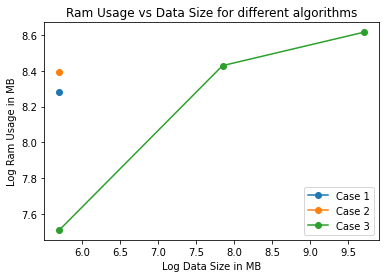

In [84]:
result_plot(df_ram, 'Ram Usage', 'Log Ram Usage in MB')